In [ ]:
# !pip install -q kaggle

# from google.colab import files
# files.upload()  # seleziona kaggle.json

# !mkdir -p ~/.kaggle
# !mv kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# from google.colab import drive
# drive.mount("/gdrive")

# DATASET_DIR = "/gdrive/MyDrive/Artificial_Neural_Networks/Image_Classification_Challenge"

# import os
# os.makedirs(DATASET_DIR, exist_ok=True)

# competition = "an2dl2526c2"

# !kaggle competitions download -c {competition} -p /content/

# zip_path = f"/content/{competition}.zip"

# !unzip -q {zip_path} -d /content/{competition}/

# print("🔁 Copia del dataset su Google Drive (solo la prima volta)...")

# !cp -r /content/{competition}/* "{DATASET_DIR}/"

# print("Dataset copiato correttamente in Drive!")

# os.listdir(DATASET_DIR)


⬆️ Carica il file kaggle.json (scaricato dal tuo profilo Kaggle → Account → API)


Saving kaggle.json to kaggle.json
✅ Kaggle API configurata correttamente!
Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
📁 Drive montato correttamente.
📂 Cartella Dataset: /gdrive/MyDrive/Artificial_Neural_Networks/Image_Classification_Challenge
📥 Download del dataset in /content/ ...
100% 1.87G/1.88G [00:21<00:00, 251MB/s]
100% 1.88G/1.88G [00:21<00:00, 93.0MB/s]
📦 Estrazione del dataset...
✅ Estrazione completata!
🔁 Copia del dataset su Google Drive (solo la prima volta)...
🎉 Dataset copiato correttamente in Drive!
📁 Contenuto della cartella dataset:


['Second_Challenge.ipynb', 'test_data', 'train_data', 'train_labels.csv']

In [71]:
from google.colab import drive
drive.mount("/gdrive")

DATASET_DIR = "/gdrive/MyDrive/Artificial_Neural_Networks/Images_Classification_Challenge/dataset"

TRAIN_IMG_DIR = f"{DATASET_DIR}/train_data"
TEST_IMG_DIR  = f"{DATASET_DIR}/test_data"
LABELS_CSV    = f"{DATASET_DIR}/train_labels.csv"

import os
print(os.listdir(DATASET_DIR))

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
['test_data', 'train_data', 'train_labels.csv']


<Axes: xlabel='label'>

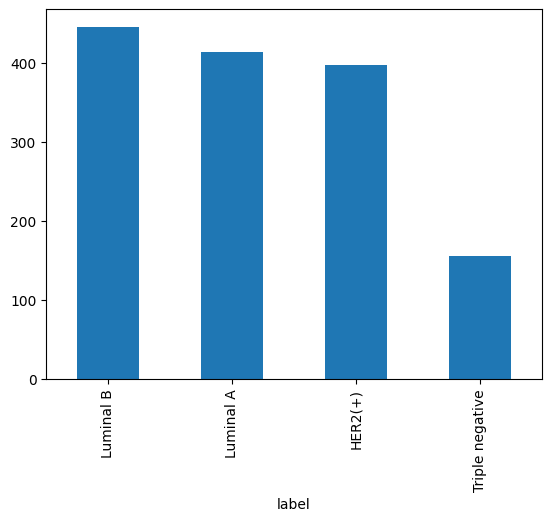

In [2]:
import pandas as pd

df = pd.read_csv(LABELS_CSV)
df.head()
df['label'].value_counts().plot(kind='bar')


OSError: [Errno 107] Transport endpoint is not connected

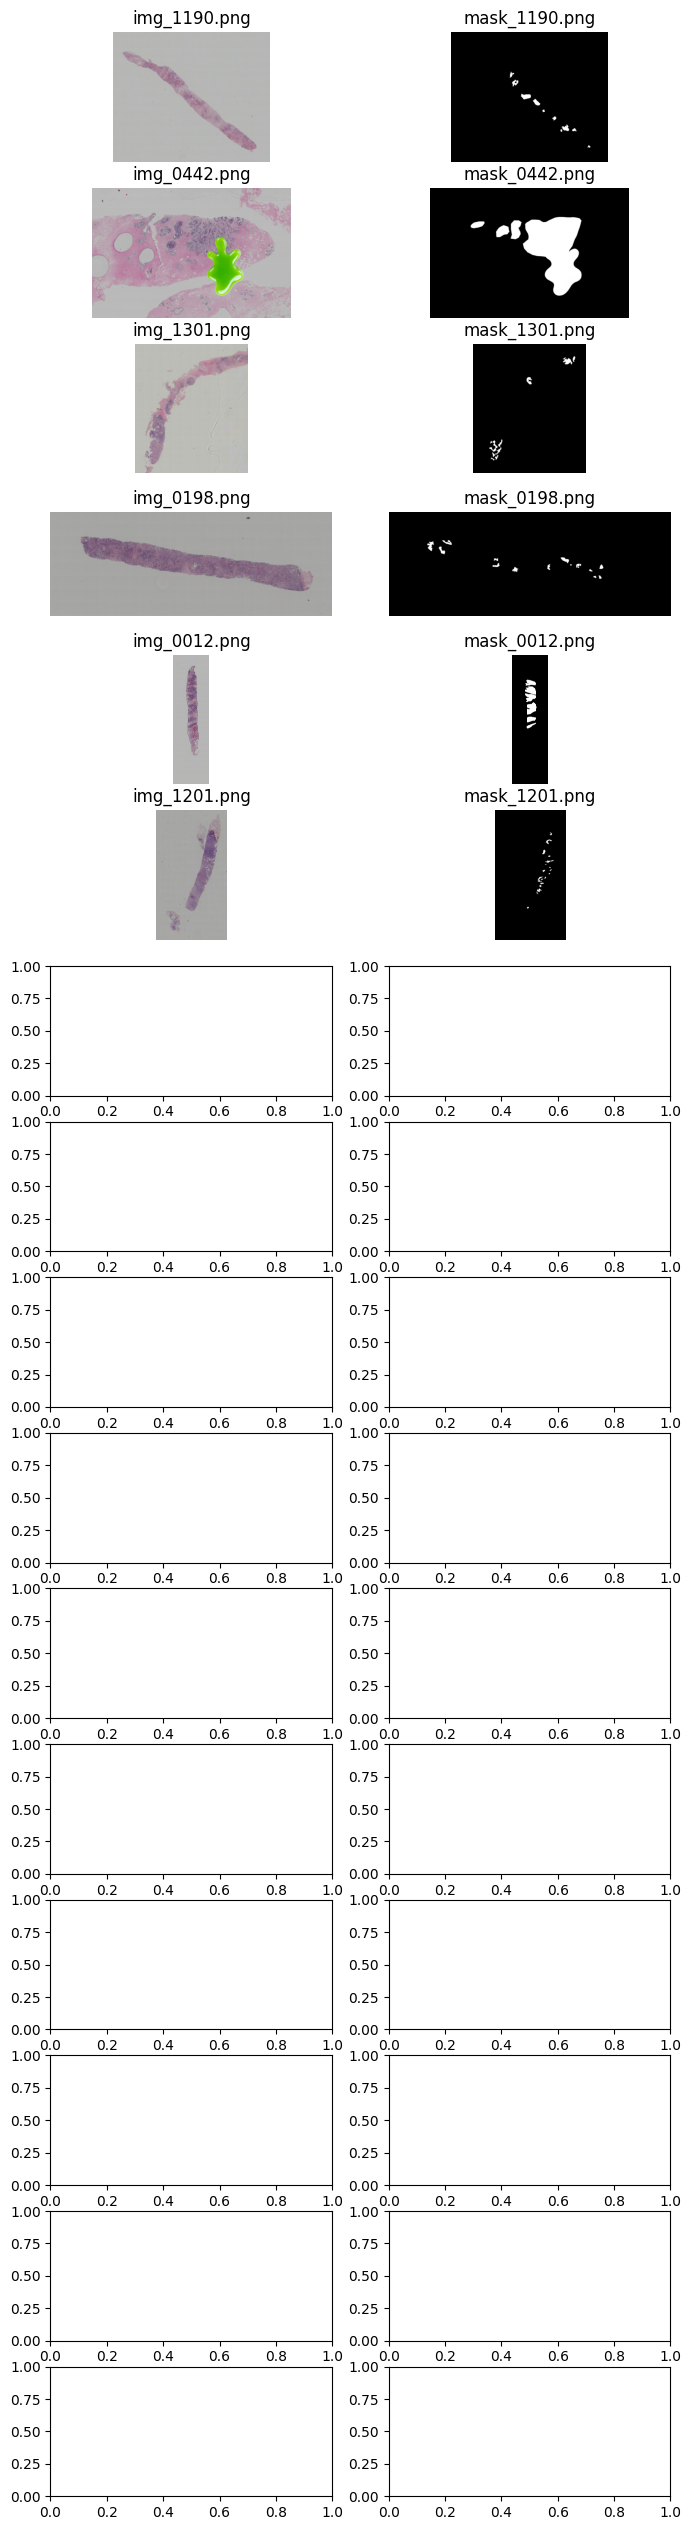

In [3]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def show_random_samples(img_dir, num_samples=16):
    # Prende tutti i file immagine nel formato img_xxxx.png
    img_files = sorted([f for f in os.listdir(img_dir) if f.startswith("img_") and f.endswith(".png")])

    # Seleziona N immagini casuali
    samples = random.sample(img_files, num_samples)

    # Prepara la griglia 4×4 (immagine + mask = 2 colonne)
    fig, axes = plt.subplots(num_samples, 2, figsize=(8, num_samples * 2))

    for i, img_name in enumerate(samples):
        img_path = os.path.join(img_dir, img_name)

        # Costruisce il nome della mask corrispondente
        mask_name = img_name.replace("img_", "mask_")
        mask_path = os.path.join(img_dir, mask_name)

        # Carica immagine e mask
        img = Image.open(img_path)
        mask = Image.open(mask_path)

        # Plot immagine
        axes[i, 0].imshow(img)
        axes[i, 0].set_title(img_name)
        axes[i, 0].axis("off")

        # Plot mask
        axes[i, 1].imshow(mask, cmap="gray")
        axes[i, 1].set_title(mask_name)
        axes[i, 1].axis("off")

    plt.tight_layout()
    plt.show()


show_random_samples(TRAIN_IMG_DIR, num_samples=16)


In [ ]:
import os
from collections import Counter
from PIL import Image

def analyze_image_sizes(img_dir, top_k=10, outlier_threshold=3):
    """
    Analizza le dimensioni (width, height) delle immagini nel dataset.

    Parametri:
        img_dir: cartella contenente img_xxxx.png
        top_k: numero di dimensioni più comuni da mostrare
        outlier_threshold: mostra come outlier tutte le dimensioni che compaiono <= questa soglia
    """

    sizes = []

    # Raccoglie tutte le dimensioni
    for fname in os.listdir(img_dir):
        if fname.startswith("img_") and fname.endswith(".png"):
            path = os.path.join(img_dir, fname)
            try:
                with Image.open(path) as img:
                    sizes.append(img.size)  # (width, height)
            except:
                print(f"⚠️ Problema con il file: {fname}")

    # Conta le frequenze
    size_counts = Counter(sizes)

    print("\n📊 **Distribuzione delle dimensioni (width × height)**")
    print("--------------------------------------------------")

    # Stampa le dimensioni più frequenti
    for (w, h), count in size_counts.most_common(top_k):
        print(f" - {w}×{h}: {count} immagini")

    # Trova outlier
    outliers = [(s, c) for s, c in size_counts.items() if c <= outlier_threshold]

    print("\n⚠️ **Dimensioni OUTLIER (comparse <= {outlier_threshold} volte)**")
    print("--------------------------------------------------")
    if outliers:
        for (w, h), count in sorted(outliers, key=lambda x: x[1]):
            print(f" - {w}×{h}: {count} immagine/i")
    else:
        print(" Nessuna dimensione outlier rilevata.")

    print("\n📦 Totale immagini analizzate:", len(sizes))
    print("📐 Dimensioni uniche trovate:", len(size_counts))


analyze_image_sizes(TRAIN_IMG_DIR, top_k=10, outlier_threshold=3)



📊 **Distribuzione delle dimensioni (width × height)**
--------------------------------------------------
 - 1024×1057: 11 immagini
 - 1024×1043: 9 immagini
 - 1291×1024: 8 immagini
 - 1024×1258: 8 immagini
 - 1134×1024: 8 immagini
 - 1024×1041: 8 immagini
 - 1024×1292: 8 immagini
 - 1024×1322: 7 immagini
 - 1024×1044: 7 immagini
 - 1331×1024: 7 immagini

⚠️ **Dimensioni OUTLIER (comparse <= {outlier_threshold} volte)**
--------------------------------------------------
 - 1024×1045: 1 immagine/i
 - 1024×2171: 1 immagine/i
 - 1024×1954: 1 immagine/i
 - 1024×2094: 1 immagine/i
 - 1616×1024: 1 immagine/i
 - 1024×1673: 1 immagine/i
 - 1700×1024: 1 immagine/i
 - 1777×1024: 1 immagine/i
 - 1024×2164: 1 immagine/i
 - 1257×1024: 1 immagine/i
 - 1024×2653: 1 immagine/i
 - 1024×1603: 1 immagine/i
 - 1024×1256: 1 immagine/i
 - 1158×1024: 1 immagine/i
 - 1024×2046: 1 immagine/i
 - 1083×1024: 1 immagine/i
 - 1146×1024: 1 immagine/i
 - 1024×1577: 1 immagine/i
 - 1024×1331: 1 immagine/i
 - 1024×2203

Pixel totali nella maschera: 86976


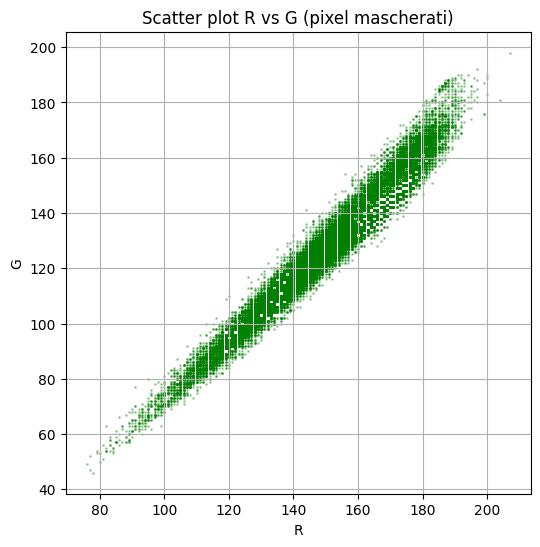

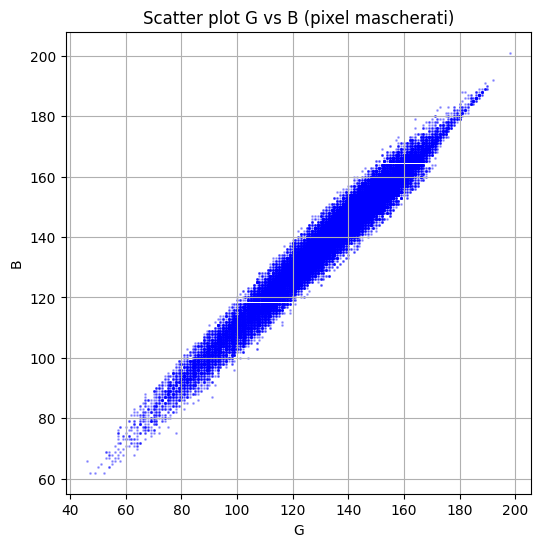

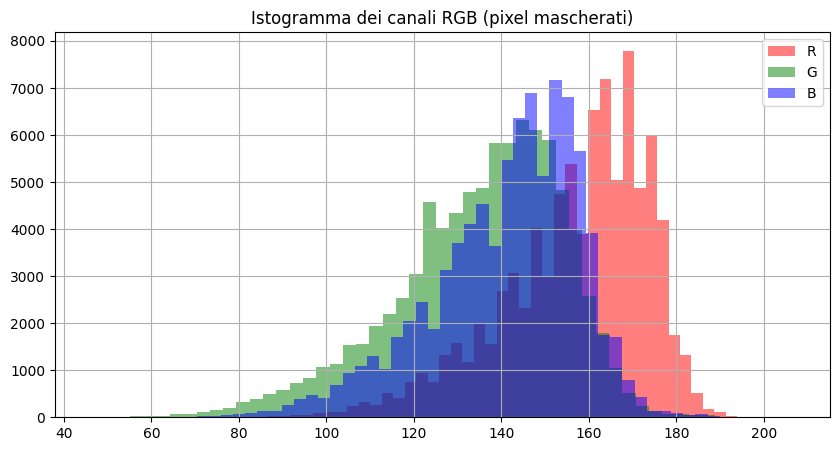

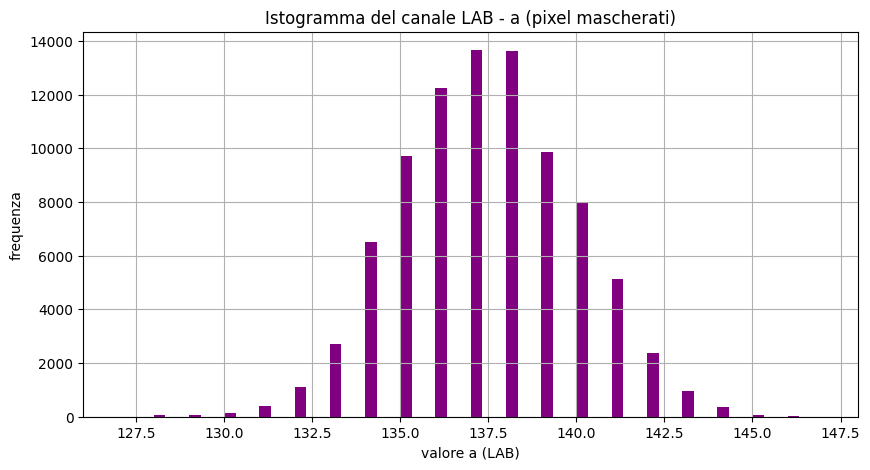

Statistiche canale LAB 'a'
  min: 127
  max: 147
  mean: 137.31046495584988
  percentili 1%-99%: [132. 143.]


In [55]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os

# ---------------------------
# CONFIGURAZIONE
# ---------------------------
IMG_NAME = "img_0192.png"  # <-- cambia tu
IMG_PATH = os.path.join(TRAIN_IMG_DIR, IMG_NAME)
MASK_PATH = IMG_PATH.replace("img_", "mask_")

# ---------------------------
# CARICAMENTO IMMAGINE + MASCHERA
# ---------------------------
img  = Image.open(IMG_PATH).convert("RGB")
mask = Image.open(MASK_PATH).convert("L")

img_arr  = np.array(img)
mask_arr = np.array(mask) > 0

# ---------------------------
# ESTRAZIONE CANALI RGB
# ---------------------------
R = img_arr[:,:,0]
G = img_arr[:,:,1]
B = img_arr[:,:,2]

R_vals = R[mask_arr]
G_vals = G[mask_arr]
B_vals = B[mask_arr]

print("Pixel totali nella maschera:", len(R_vals))

# ---------------------------------------------------------
# 1) SCATTER R VS G
# ---------------------------------------------------------
plt.figure(figsize=(6,6))
plt.scatter(R_vals, G_vals, s=1, alpha=0.3, color="green")
plt.xlabel("R")
plt.ylabel("G")
plt.title("Scatter plot R vs G (pixel mascherati)")
plt.grid(True)
plt.show()

# ---------------------------------------------------------
# 2) SCATTER G VS B
# ---------------------------------------------------------
plt.figure(figsize=(6,6))
plt.scatter(G_vals, B_vals, s=1, alpha=0.3, color="blue")
plt.xlabel("G")
plt.ylabel("B")
plt.title("Scatter plot G vs B (pixel mascherati)")
plt.grid(True)
plt.show()

# ---------------------------------------------------------
# 3) ISTOGRAMMI RGB
# ---------------------------------------------------------
plt.figure(figsize=(10,5))
plt.hist(R_vals, bins=50, alpha=0.5, label="R", color="red")
plt.hist(G_vals, bins=50, alpha=0.5, label="G", color="green")
plt.hist(B_vals, bins=50, alpha=0.5, label="B", color="blue")
plt.title("Istogramma dei canali RGB (pixel mascherati)")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------------------------
# 4) ISTOGRAMMA DEL CANALE LAB 'a'
# ---------------------------------------------------------
lab = cv2.cvtColor(img_arr, cv2.COLOR_RGB2LAB)
L, A, B2 = lab[:,:,0], lab[:,:,1], lab[:,:,2]

A_vals = A[mask_arr]

plt.figure(figsize=(10,5))
plt.hist(A_vals, bins=60, color="purple")
plt.title("Istogramma del canale LAB - a (pixel mascherati)")
plt.xlabel("valore a (LAB)")
plt.ylabel("frequenza")
plt.grid(True)
plt.show()

print("Statistiche canale LAB 'a'")
print("  min:", np.min(A_vals))
print("  max:", np.max(A_vals))
print("  mean:", np.mean(A_vals))
print("  percentili 1%-99%:", np.percentile(A_vals, [1,99]))


Pixel totali nella maschera: 4835


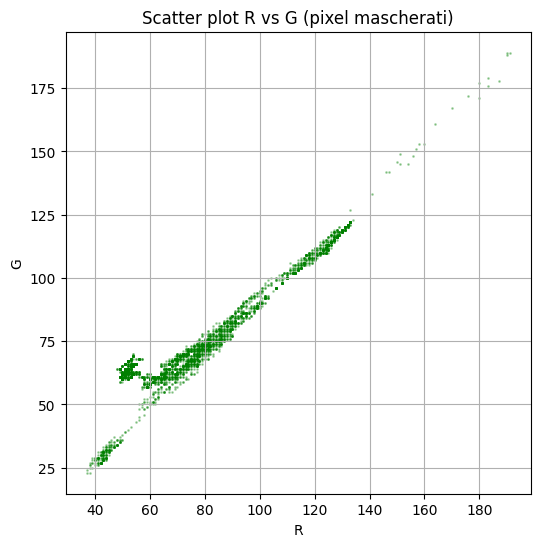

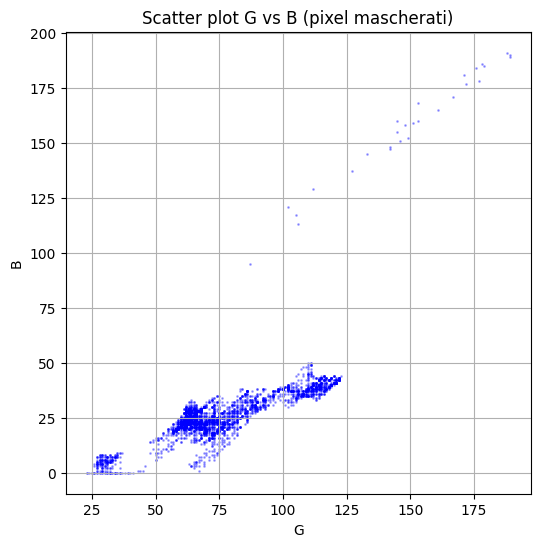

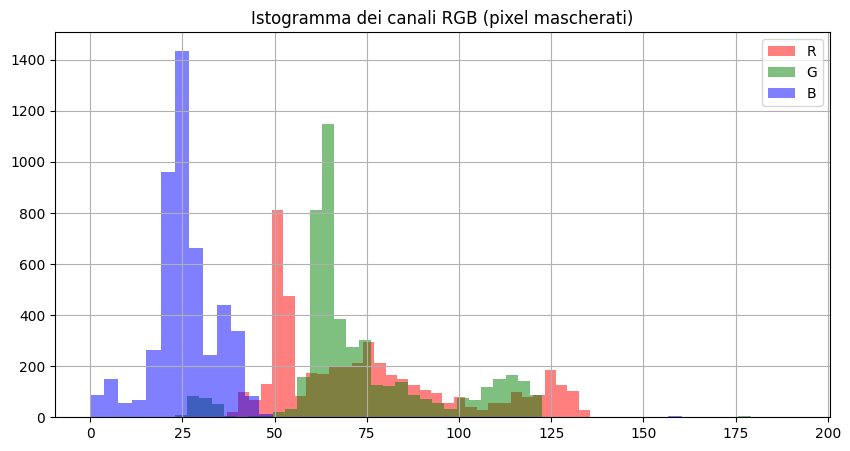

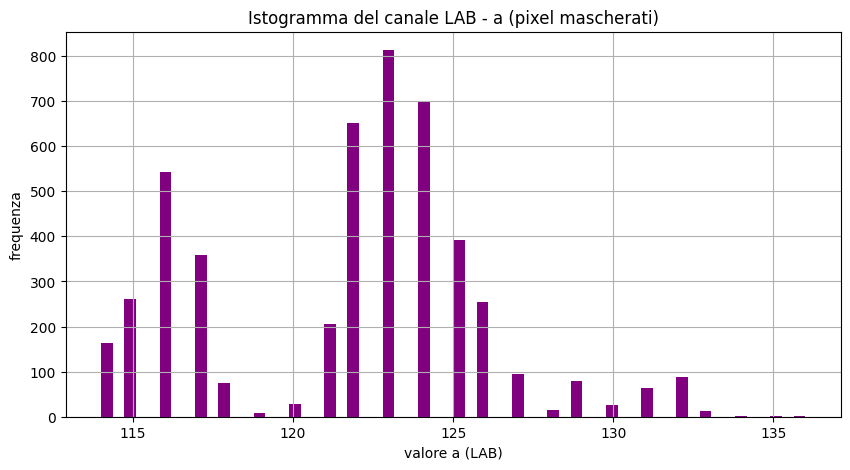

Statistiche canale LAB 'a'
  min: 114
  max: 136
  mean: 121.70444674250258
  percentili 1%-99%: [114. 132.]


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os

# ---------------------------
# CONFIGURAZIONE
# ---------------------------
IMG_NAME = "img_0193.png"  # <-- cambia tu
IMG_PATH = os.path.join(TRAIN_IMG_DIR, IMG_NAME)
MASK_PATH = IMG_PATH.replace("img_", "mask_")

# ---------------------------
# CARICAMENTO IMMAGINE + MASCHERA
# ---------------------------
img  = Image.open(IMG_PATH).convert("RGB")
mask = Image.open(MASK_PATH).convert("L")

img_arr  = np.array(img)
mask_arr = np.array(mask) > 0

# ---------------------------
# ESTRAZIONE CANALI RGB
# ---------------------------
R = img_arr[:,:,0]
G = img_arr[:,:,1]
B = img_arr[:,:,2]

R_vals = R[mask_arr]
G_vals = G[mask_arr]
B_vals = B[mask_arr]

print("Pixel totali nella maschera:", len(R_vals))

# ---------------------------------------------------------
# 1) SCATTER R VS G
# ---------------------------------------------------------
plt.figure(figsize=(6,6))
plt.scatter(R_vals, G_vals, s=1, alpha=0.3, color="green")
plt.xlabel("R")
plt.ylabel("G")
plt.title("Scatter plot R vs G (pixel mascherati)")
plt.grid(True)
plt.show()

# ---------------------------------------------------------
# 2) SCATTER G VS B
# ---------------------------------------------------------
plt.figure(figsize=(6,6))
plt.scatter(G_vals, B_vals, s=1, alpha=0.3, color="blue")
plt.xlabel("G")
plt.ylabel("B")
plt.title("Scatter plot G vs B (pixel mascherati)")
plt.grid(True)
plt.show()

# ---------------------------------------------------------
# 3) ISTOGRAMMI RGB
# ---------------------------------------------------------
plt.figure(figsize=(10,5))
plt.hist(R_vals, bins=50, alpha=0.5, label="R", color="red")
plt.hist(G_vals, bins=50, alpha=0.5, label="G", color="green")
plt.hist(B_vals, bins=50, alpha=0.5, label="B", color="blue")
plt.title("Istogramma dei canali RGB (pixel mascherati)")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------------------------
# 4) ISTOGRAMMA DEL CANALE LAB 'a'
# ---------------------------------------------------------
lab = cv2.cvtColor(img_arr, cv2.COLOR_RGB2LAB)
L, A, B2 = lab[:,:,0], lab[:,:,1], lab[:,:,2]

A_vals = A[mask_arr]

plt.figure(figsize=(10,5))
plt.hist(A_vals, bins=60, color="purple")
plt.title("Istogramma del canale LAB - a (pixel mascherati)")
plt.xlabel("valore a (LAB)")
plt.ylabel("frequenza")
plt.grid(True)
plt.show()

print("Statistiche canale LAB 'a'")
print("  min:", np.min(A_vals))
print("  max:", np.max(A_vals))
print("  mean:", np.mean(A_vals))
print("  percentili 1%-99%:", np.percentile(A_vals, [1,99]))


In [72]:
def is_green_artifact_lab(img, a_thresh=120, ratio_thresh=0.01):
    """
    Identifica artefatti verdi nelle immagini H&E usando il canale 'a' di LAB.
    """
    img_arr = np.array(img)
    lab = cv2.cvtColor(img_arr, cv2.COLOR_RGB2LAB)
    A = lab[:,:,1]  # canale 'a': rosso <-> verde

    green_pixels = (A < a_thresh)
    ratio = green_pixels.mean()

    return ratio > ratio_thresh


In [75]:
IMG_NAME = "img_0228.png"  # <-- cambia tu
IMG_PATH = os.path.join(TRAIN_IMG_DIR, IMG_NAME)
img  = Image.open(IMG_PATH).convert("RGB")
if is_green_artifact_lab(img):
    print("Artefatto verde trovato!")
else:
    print("Nessun artefatto verde trovato.")

Nessun artefatto verde trovato.


In [48]:
import os
import matplotlib.pyplot as plt
from PIL import Image

contaminated = []
clean = []

for fname in os.listdir(TRAIN_IMG_DIR):
    if not fname.startswith("img_"):
        continue
    path = os.path.join(TRAIN_IMG_DIR, fname)

    img = Image.open(path).convert("RGB")
    is_cont = is_green_artifact_lab(img)

    if is_cont:
        contaminated.append(fname)
    else:
        clean.append(fname)

print("Totale immagini analizzate :", len(clean) + len(contaminated))
print("Immagini contaminate       :", len(contaminated))
print("Immagini pulite            :", len(clean))

# Ordina per gravità contaminazione
contaminated_sorted = sorted(contaminated, key=lambda x: x[1], reverse=True)


Totale immagini analizzate : 1412
Immagini contaminate       : 165
Immagini pulite            : 1247


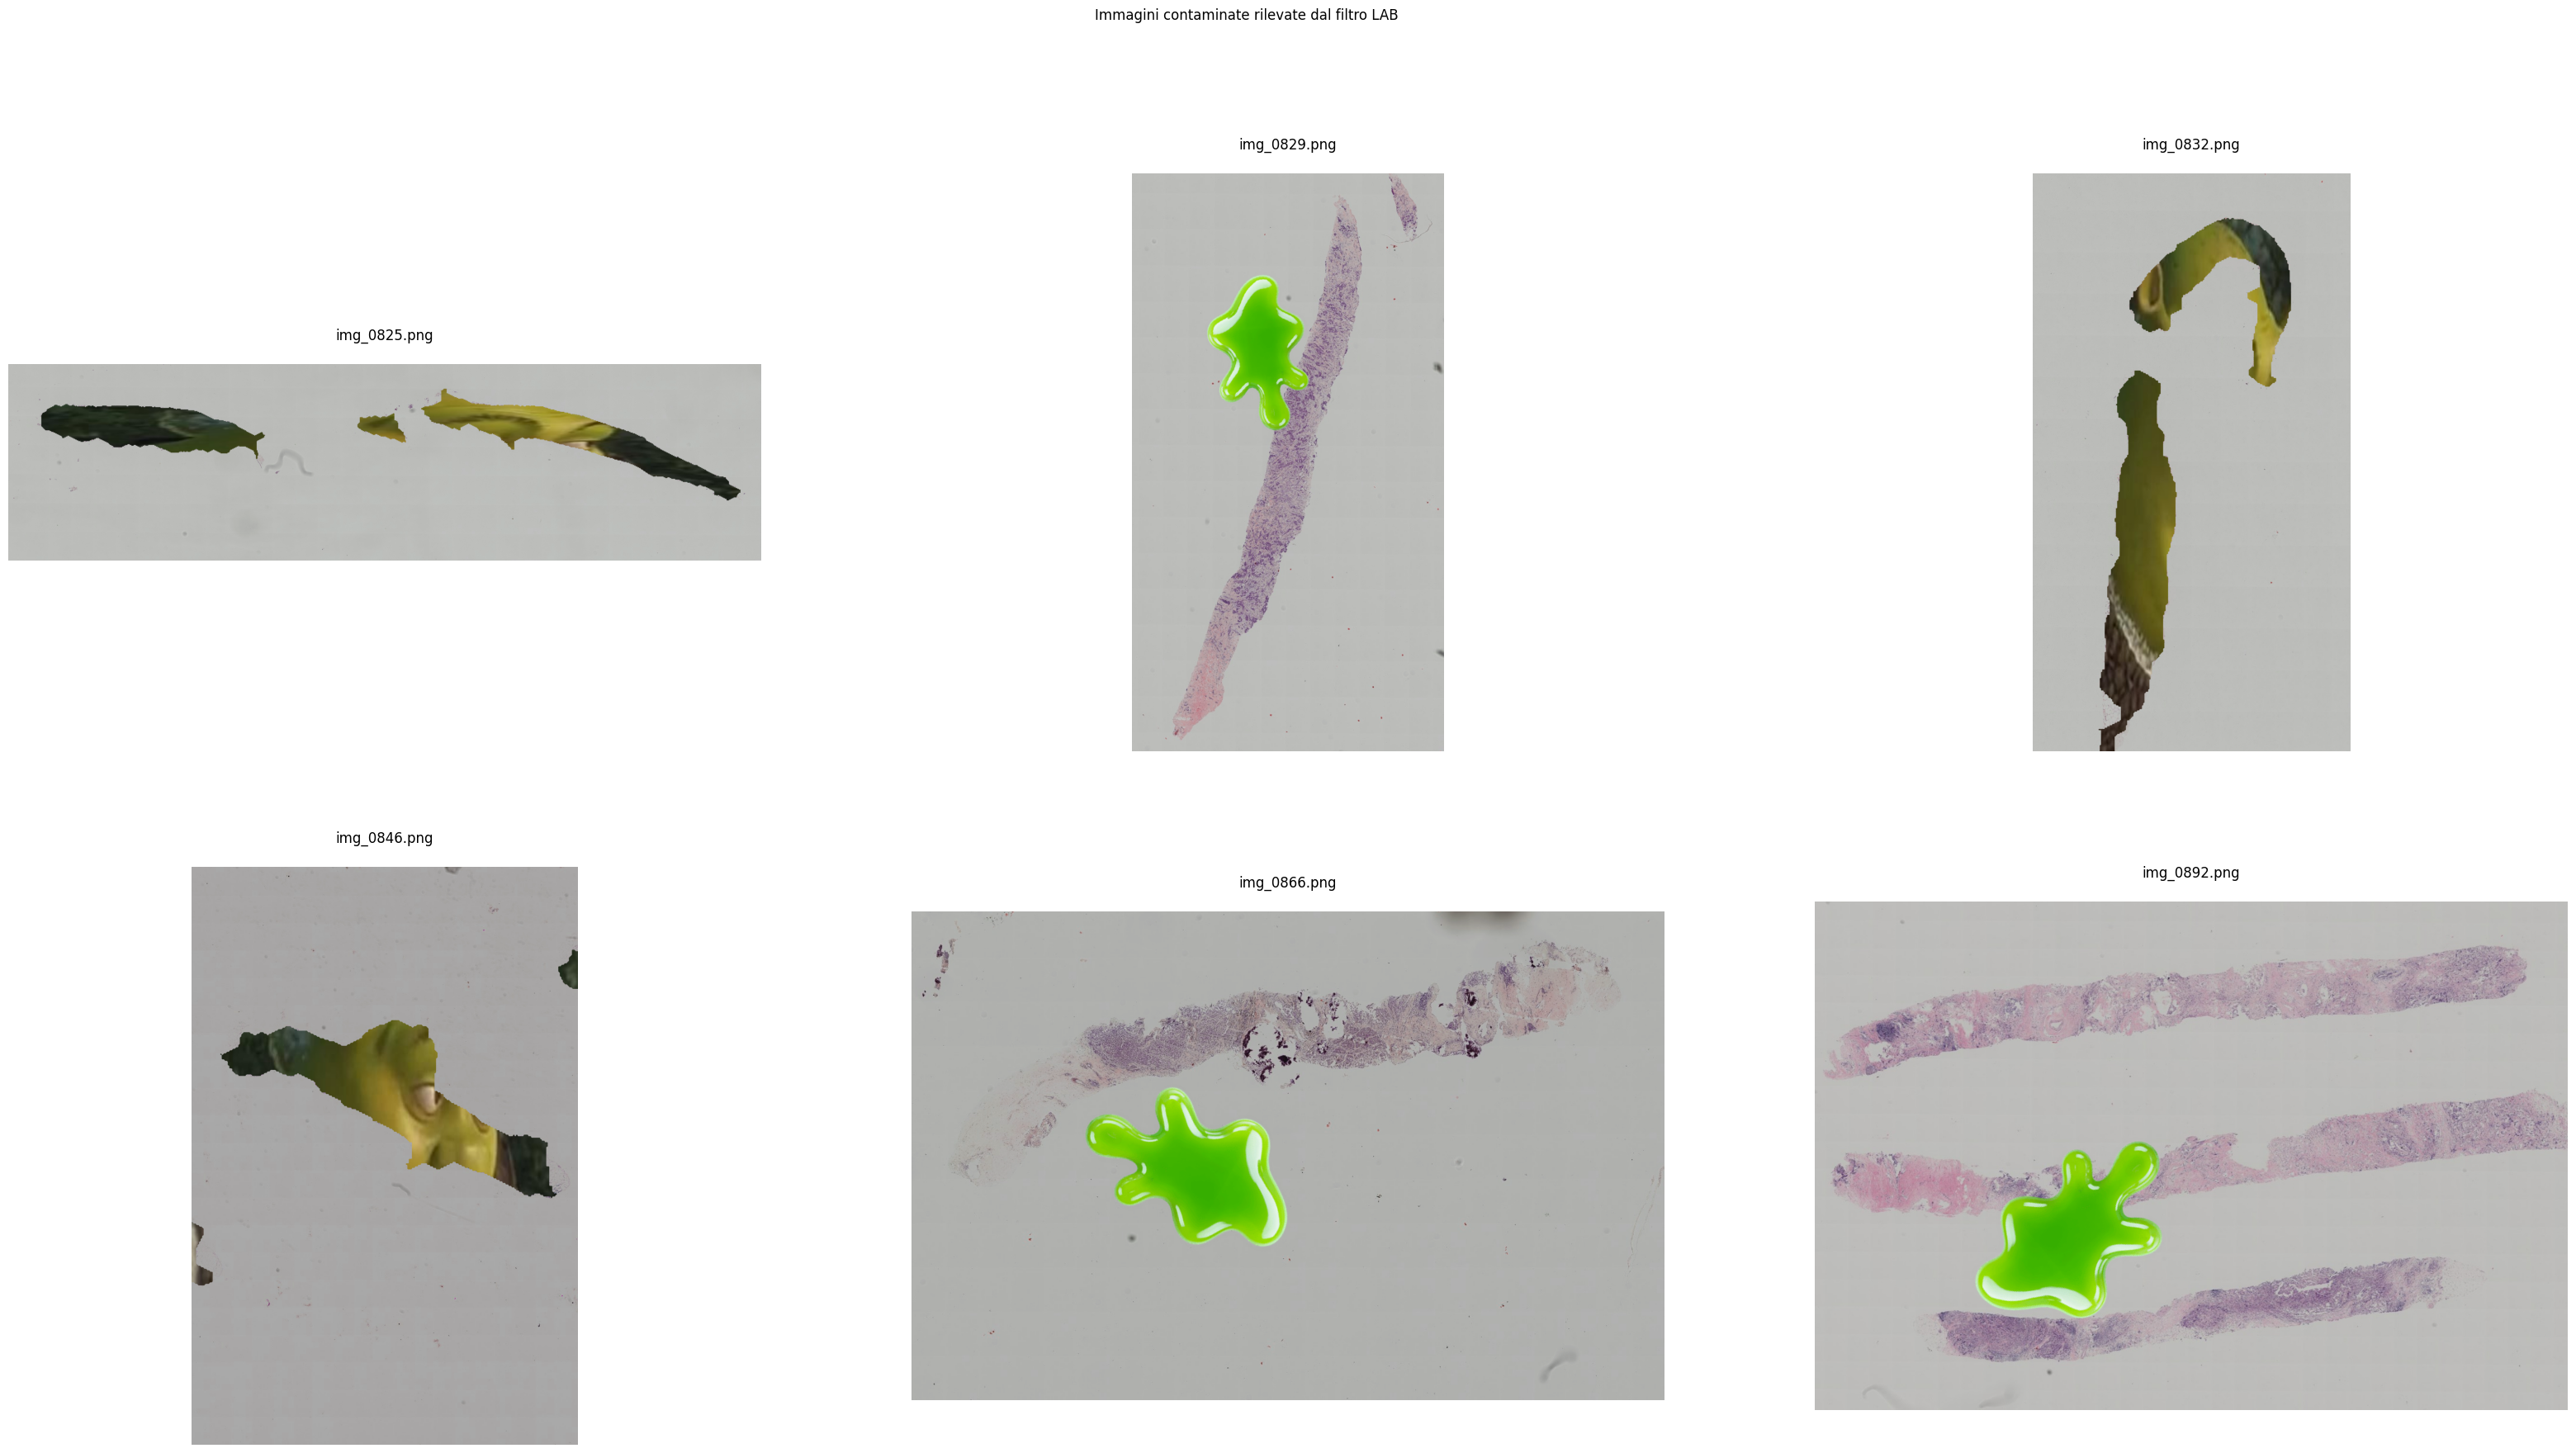

In [53]:
def show_contaminated(samples, base_path, n=20):
    if len(samples) == 0:
        print("Nessuna immagine contaminata trovata.")
        return

    plt.figure(figsize=(40,20))

    for i, (fname) in enumerate(samples[:n]):
        img = Image.open(os.path.join(base_path, fname))

        plt.subplot(2, (n+1)//2, i+1)
        plt.imshow(img)
        plt.title(f"{fname}\n")
        plt.axis("off")

    plt.suptitle("Immagini contaminate rilevate dal filtro LAB")
    plt.show()

show_contaminated(contaminated_sorted, TRAIN_IMG_DIR, n=6)


In [76]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from torch.utils.data import Dataset


# ---------------------------------------------------------
#  LOADING FUNCTIONS
# ---------------------------------------------------------

def load_rgb(path):
    return Image.open(path).convert("RGB")

def load_mask(path):
    # Mask must be binary {0,255} or boolean convertible
    return Image.open(path).convert("L")


# ---------------------------------------------------------
#  MASK-BASED TUMOR DETECTION
# ---------------------------------------------------------

def mask_active(mask_arr, min_ratio=0.02):
    """
    Ritorna True se la percentuale di pixel attivi nella maschera
    supera min_ratio (es. 1% del tile).

    È l'equivalente del classifier tumor vs non-tumor del paper,
    ma basato direttamente sulla maschera.
    """
    return (mask_arr > 0).mean() >= min_ratio

# ---------------------------------------------------------
#  DETECT GREEN ARTIFACT
# ---------------------------------------------------------

def is_green_artifact_lab(img, a_thresh=120, ratio_thresh=0.01):
    """
    Identifica artefatti verdi nelle immagini H&E usando il canale 'a' di LAB.
    """
    img_arr = np.array(img)
    lab = cv2.cvtColor(img_arr, cv2.COLOR_RGB2LAB)
    A = lab[:,:,1]  # canale 'a': rosso <-> verde

    green_pixels = (A < a_thresh)
    ratio = green_pixels.mean()

    return ratio > ratio_thresh


# ---------------------------------------------------------
#  TILE EXTRACTION
# ---------------------------------------------------------

def extract_masked_tiles(img, mask, tile_size=256, stride=256, min_mask_ratio=0.02):
    """
    Divide la WSI in tiles, tiene quelli tumorali (via maschera)
    ed esclude i tiles contenenti artefatti verdi (via LAB).
    """
    img_arr  = np.array(img)
    mask_arr = np.array(mask)

    H, W = mask_arr.shape
    tiles = []

    for y in range(0, H - tile_size + 1, int(stride)):
        for x in range(0, W - tile_size + 1, int(stride)):

            tile_img  = img_arr[y:y+tile_size, x:x+tile_size]
            tile_mask = mask_arr[y:y+tile_size, x:x+tile_size]

            # 1️⃣ Tile senza tessuto tumorale → scartato
            if not mask_active(tile_mask, min_ratio=min_mask_ratio):
                continue

            tile = Image.fromarray(tile_img)

            # 2️⃣ Tile con artefatto verde → scartato
            if is_green_artifact_lab(tile):
                continue

            # 3️⃣ Tile pulito → aggiungi al dataset
            tiles.append(tile)

    return tiles

def get_stride_for_label(label, tile_size):
    # classe meno espressa
    if label == "Triple negative":
        return tile_size * 0.5  # 50% overlap
    else:
        return tile_size * 0.8     # overlap

# ---------------------------------------------------------
#  DATASET CLASS
# ---------------------------------------------------------

class HistologyMaskedTiles(Dataset):
    """
    Dataset che:
    - legge WSI già salvate come immagini ridotte/regioni,
    - legge la maschera associata,
    - divide in tiles 256x256,
    - tiene solo i tiles con maschera attiva,
    - restituisce tiles + label.

    Esattamente il preprocessing dello stadio 1 -> stadio 2 del paper,
    ma usando la maschera invece di un CNN tumor/non-tumor.
    """
    def __init__(self, img_dir, labels_csv, tile_size=256,
                 min_mask_ratio=0.02):

        self.img_dir = img_dir
        self.labels = pd.read_csv(labels_csv)
        self.tile_size = tile_size
        self.min_mask_ratio = min_mask_ratio

        # prepara lista (tile, label)
        self.samples = self._prepare_samples()

    def _prepare_samples(self):
        samples = []

        for _, row in self.labels.iterrows():
            img_name  = row["sample_index"]
            label     = row["label"]

            img_path  = os.path.join(self.img_dir, img_name)
            mask_path = img_path.replace("img_", "mask_")

            # carico WSI/patch & mask
            img  = load_rgb(img_path)
            mask = load_mask(mask_path)

            stride = get_stride_for_label(label, self.tile_size)

            # estraggo tiles tumorali
            tiles = extract_masked_tiles(
                img, mask,
                tile_size=self.tile_size,
                stride=stride,
                min_mask_ratio=self.min_mask_ratio
            )

            # salvo tiles come lista (immagine PIL, label)
            for t in tiles:
                samples.append((t, label))

        return samples

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img, label = self.samples[idx]
        return img, label


In [99]:
from torchvision import transforms

dataset = HistologyMaskedTiles(
    img_dir=TRAIN_IMG_DIR,
    labels_csv=LABELS_CSV,
    tile_size=256,
    min_mask_ratio=0.1,
)


Numero totale di tiles estratti: 3048

Distribuzione delle classi:
Triple negative: 719
Luminal B: 902
HER2(+): 764
Luminal A: 663


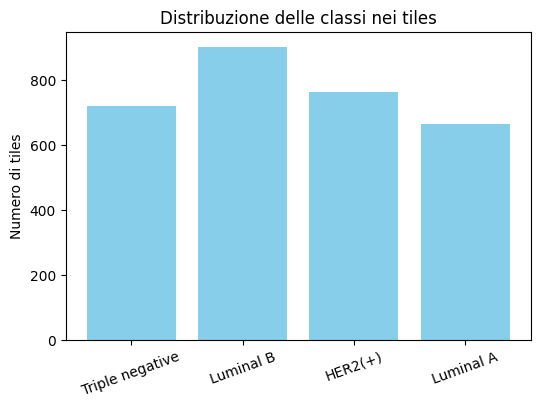

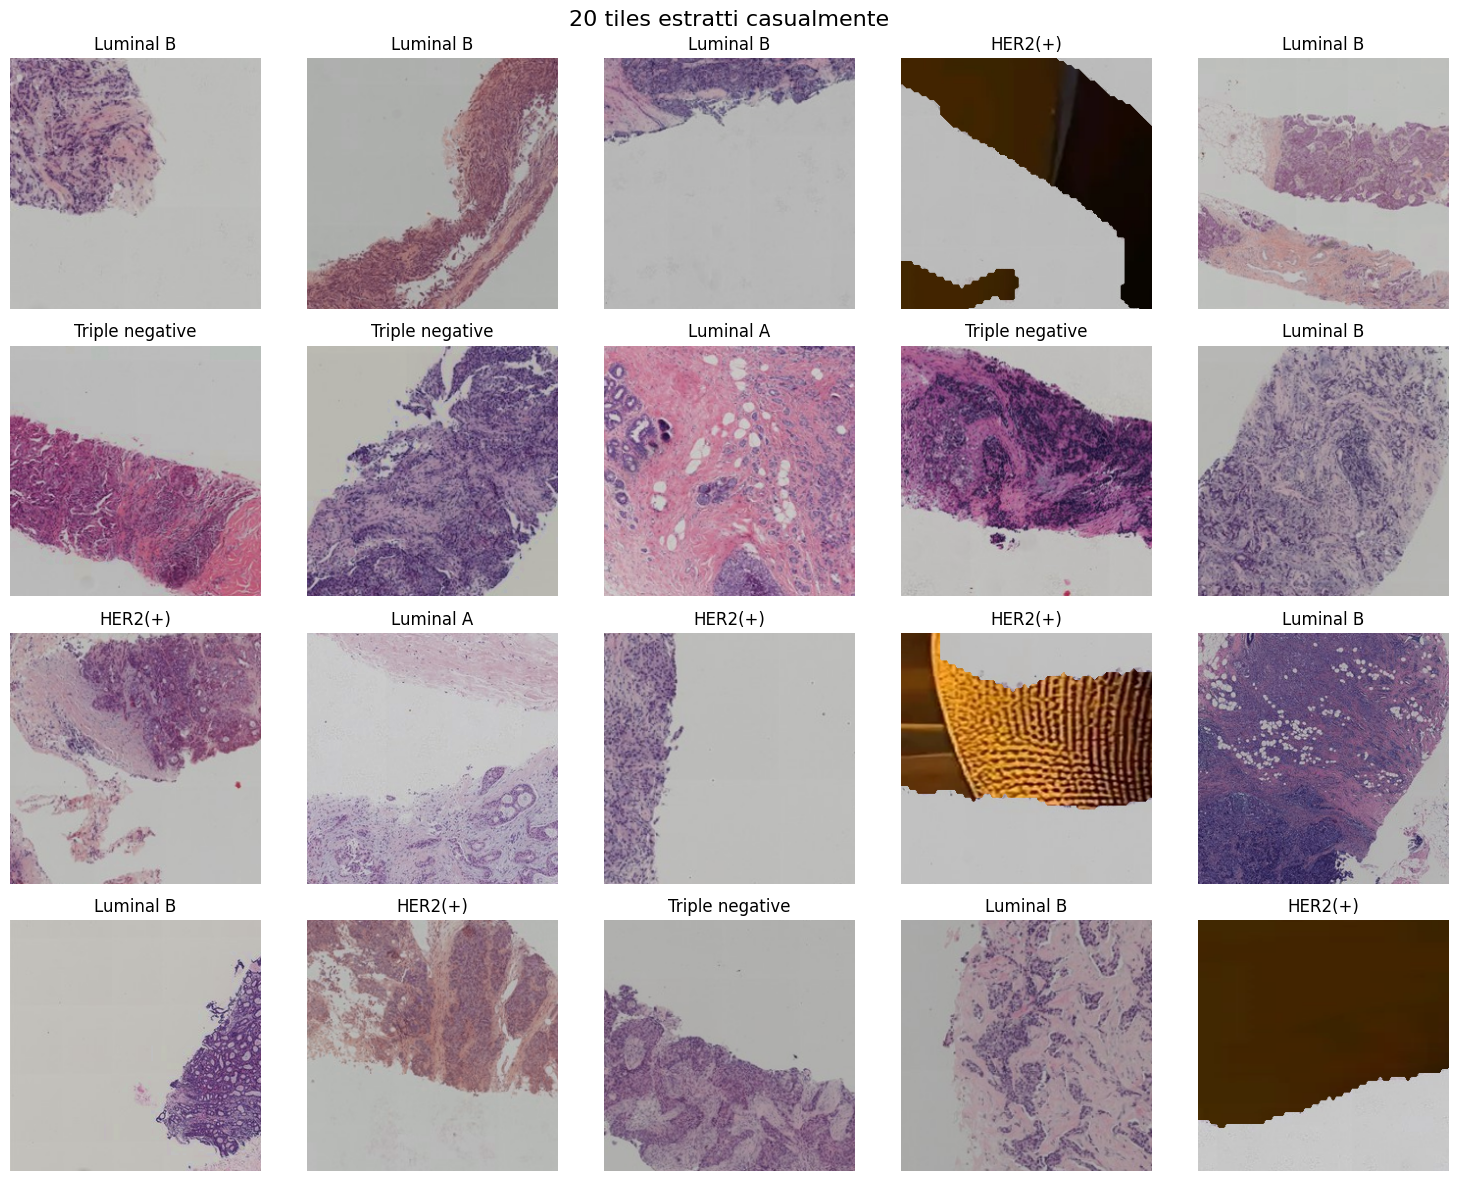

In [100]:
import matplotlib.pyplot as plt
from collections import Counter
import random
import math

print(f"Numero totale di tiles estratti: {len(dataset)}")


# ---------------------------------------------------------
# DISTRIBUZIONE DELLE LABELS
# ---------------------------------------------------------

labels = [label for _, label in dataset.samples]
label_counts = Counter(labels)

print("\nDistribuzione delle classi:")
for cls, count in label_counts.items():
    print(f"{cls}: {count}")

# Bar plot
plt.figure(figsize=(6,4))
plt.bar(label_counts.keys(), label_counts.values(), color="skyblue")
plt.title("Distribuzione delle classi nei tiles")
plt.ylabel("Numero di tiles")
plt.xticks(rotation=20)
plt.show()


# ---------------------------------------------------------
# STAMPA DI ALCUNE IMMAGINI DEL DATASET
# ---------------------------------------------------------

def show_random_tiles(dataset, n=20):
    idxs = random.sample(range(len(dataset)), n)

    # Calcola layout dinamico (quadrato o quasi)
    cols = int(math.ceil(math.sqrt(n)))
    rows = int(math.ceil(n / cols))

    plt.figure(figsize=(cols * 3, rows * 3))

    for i, idx in enumerate(idxs):
        img, label = dataset[idx]

        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.title(str(label))
        plt.axis("off")

    plt.suptitle(f"{n} tiles estratti casualmente", fontsize=16)
    plt.tight_layout()
    plt.show()

show_random_tiles(dataset, n=20)

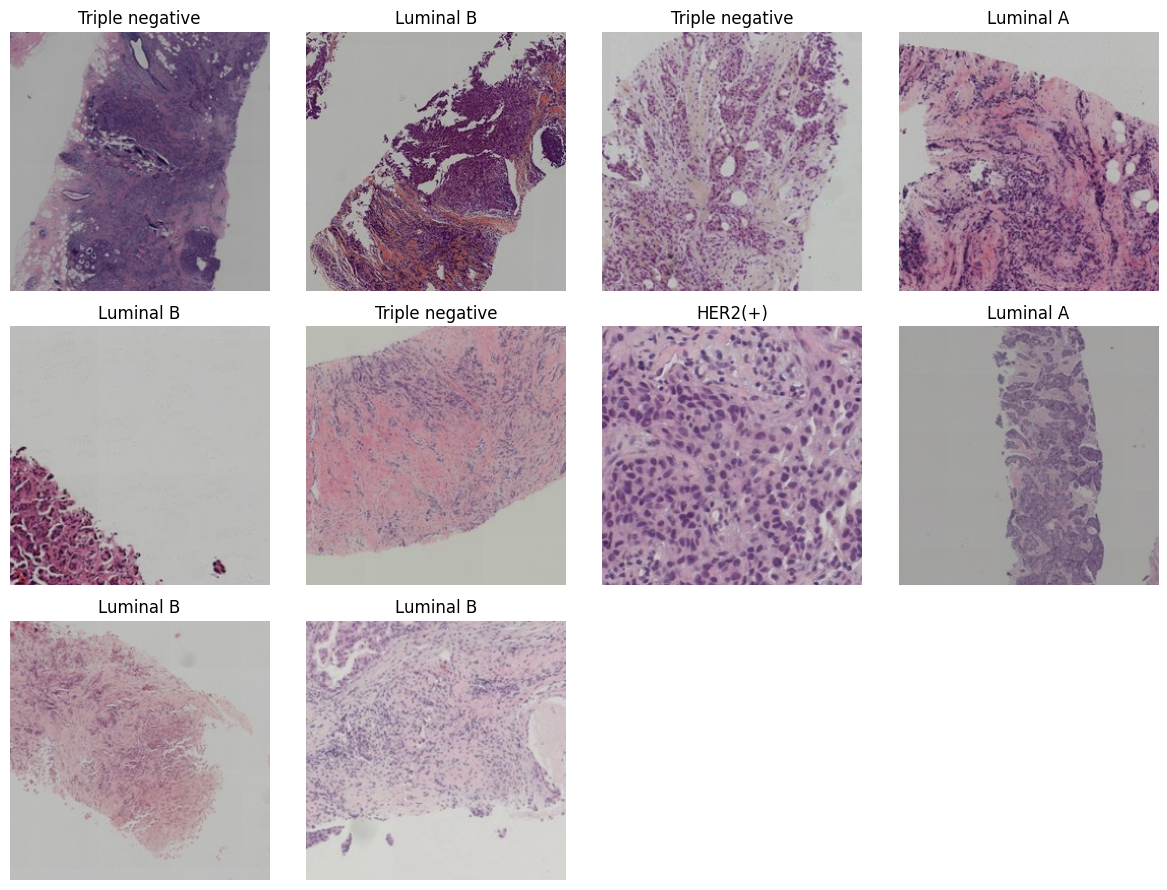

In [102]:
import matplotlib.pyplot as plt
import random
import numpy as np
import math
import torch

def show_dataset_samples(dataset, n=200):
    # Ensure n does not exceed the dataset size
    n = min(n, len(dataset))
    idxs = random.sample(range(len(dataset)), n)

    # Calculate grid size dynamically
    cols = int(math.ceil(math.sqrt(n))) # Approximate a square-ish grid
    rows = int(math.ceil(n / cols))

    plt.figure(figsize=(cols * 3, rows * 3)) # Adjust figure size dynamically

    for i, idx in enumerate(idxs):
        img, label = dataset[idx]

        # converti tensor in immagine numpy
        if isinstance(img, torch.Tensor):
            img_np = img.permute(1, 2, 0).numpy()
            img_np = np.clip(img_np, 0, 1)   # per evitare valori fuori range
        else:
            img_np = np.array(img)

        plt.subplot(rows, cols, i+1)
        plt.imshow(img_np)
        plt.title(str(label))
        plt.axis("off")

    plt.tight_layout()
    plt.show()


show_dataset_samples(dataset, n=10)

In [91]:
for i in range(len(dataset)):
    img, label = dataset[i+5000]
    print(np.array(img).shape, label)
    if i==10:
      break


(256, 256, 3) Luminal B
(256, 256, 3) Luminal A
(256, 256, 3) Luminal A
(256, 256, 3) Luminal A
(256, 256, 3) Luminal A
(256, 256, 3) Luminal A
(256, 256, 3) Luminal A
(256, 256, 3) Luminal A
(256, 256, 3) Luminal A
(256, 256, 3) Luminal A
(256, 256, 3) Luminal A
